# Cricket Analysis and Prediction.

## Libraries and Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ipl.csv')

In [3]:
data.head(4)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222


In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

## Data Preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [15]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,7.601400e+04
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452,inf
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000e+00
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,6.000000e+00
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,7.232877e+00
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,8.400000e+00
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,inf


Some of the less usefull columns can be removed. For prediction purposes, date has no significance. Also columns like batsman and bowler are string so during encoding they can create in large number of columns which will decrease the efficiency and accuracy.

In [16]:
data = data.drop(['mid','date','batsman', 'bowler'], axis=1)

In [17]:
data.head(3)

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.0
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.0
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.0


In [19]:
#check if null values.
data.isnull().sum()

venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
run_rate          0
dtype: int64

Let's add a new feature called run_rate as run rate is very helpfull in cricket and run rate also give us better understanding about current condition in cricket.

In [25]:

data['run_rate'] = data['runs']/((data['overs'] - 
                   data['overs']%1)+ (data['overs']%1)*(10/6))


In [26]:
data["run_rate"]

0        6.000000
1        3.000000
2        6.000000
3        4.000000
4        3.000000
           ...   
76009    6.258621
76010    6.512821
76011    6.508475
76012    6.504202
76013    6.450000
Name: run_rate, Length: 76014, dtype: float64

In [27]:
detail = data.describe()
detail

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,7.601400e+04
mean,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452,inf
std,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000e+00
25%,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,6.000000e+00
50%,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,7.232877e+00
75%,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,8.400000e+00
max,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,inf


In [28]:
data['run_rate'].isnull().sum()

0

there is no Nan in sr but inf value is there. So Lets handle it by replacing with nan and then we can remove nan values.

In [29]:
data['run_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:

data['run_rate'].isnull().sum()


37

In [31]:
data.dropna(inplace=True)

In [32]:
data.head(2)

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.0
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.0


Lets Plot histogram for run_rate

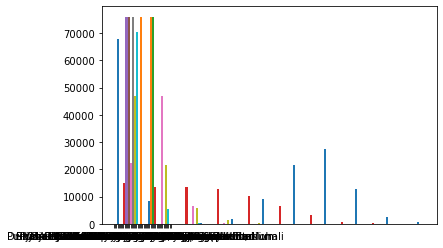

In [33]:

plt.hist(data[np.isfinite(data['run_rate'])].values)

plt.show()


In [34]:
data.max()

venue                Wankhede Stadium
bat_team          Sunrisers Hyderabad
bowl_team         Sunrisers Hyderabad
runs                              263
wickets                            10
overs                            19.6
runs_last_5                       113
wickets_last_5                      7
striker                           175
non-striker                       109
total                             263
run_rate                           66
dtype: object

## Categorical Encoding

Both practically and logically we can think Columns such as "venue", "bat_team" and "bowl_team" are important for the results. They can be encoded using OneHot Encoder.
But that will add up a lot many new columns because it create 2 columns for one unique values. So there can be 2*number_of_unique_values.
Therefore it may create a risk of overfitting. 
So Lets use binary encoding.Also according to some research paper, when we use same model and data, binary encoding gives as good a result as OneHotEncoding.
So in order to avoid making too many features as a result of encoding, we decided to go with BinaryEncoder for 'venue', 'bat_team' and 'bowl_team'.

In [35]:

#Lets first encode for venue
encoder = ce.BinaryEncoder(['venue'])
databin = encoder.fit_transform(data['venue'])
data = pd.concat([data, databin], axis=1)



In [36]:
print(data.columns)

Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total',
       'run_rate', 'venue_0', 'venue_1', 'venue_2', 'venue_3', 'venue_4',
       'venue_5', 'venue_6'],
      dtype='object')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  run_rate        75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [38]:
# Now lets encode for bat teams as well

import category_encoders as ce

encoder = ce.BinaryEncoder(['bat_team'])
databin = encoder.fit_transform(data['bat_team'])
data = pd.concat([data, databin], axis=1)


data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,...,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,...,0,0,1,1,1,0,0,1,0,0
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,...,0,0,1,1,1,0,0,1,0,0
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,...,0,0,1,1,1,0,0,1,0,0
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,...,0,0,1,1,1,0,0,1,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  run_rate        75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [50]:
# Now Lets encode for bowling teams as well

import category_encoders as ce

encoder = ce.BinaryEncoder(['bowl_team'])
databin = encoder.fit_transform(data['bowl_team'])
data = pd.concat([data, databin], axis=1)

data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,...,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,...,0,1,1,1,0,0,1,1,1,0
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,...,0,1,1,1,0,0,1,1,1,0
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,...,0,1,1,1,0,0,1,1,1,0
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,...,0,1,1,1,0,0,1,1,1,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  run_rate        75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [52]:
data.head(2)

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,...,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
data.columns

Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total',
       'run_rate', 'venue_0', 'venue_1', 'venue_2', 'venue_3', 'venue_4',
       'venue_5', 'venue_6', 'bat_team_0', 'bat_team_1', 'bat_team_2',
       'bat_team_3', 'bat_team_4', 'bowl_team_0', 'bowl_team_1', 'bowl_team_2',
       'bowl_team_3', 'bowl_team_4', 'bowl_team_0', 'bowl_team_1',
       'bowl_team_2', 'bowl_team_3', 'bowl_team_4', 'bowl_team_0',
       'bowl_team_1', 'bowl_team_2', 'bowl_team_3', 'bowl_team_4'],
      dtype='object')

In [54]:
# SO after Encoding all venues, batsman, bowlers we get 48 columns which is fine.

In [55]:
data['venue'].value_counts()

M Chinnaswamy Stadium                                   7441
Feroz Shah Kotla                                        7067
Eden Gardens                                            7046
Wankhede Stadium                                        7046
MA Chidambaram Stadium, Chepauk                         5965
Rajiv Gandhi International Stadium, Uppal               5826
Punjab Cricket Association Stadium, Mohali              4245
Sawai Mansingh Stadium                                  4109
Dr DY Patil Sports Academy                              2087
Subrata Roy Sahara Stadium                              2085
Maharashtra Cricket Association Stadium                 1841
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1377
SuperSport Park                                         1375
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

Finally after encoding, we ended up with 27 columns out of which 3 are redundant originals and 1 is target column. So there are 24 feature columns.

In [56]:
# Lets drop venue, bat_team, bowl_team as it is alreay encoded.

In [57]:
df = data.drop(['venue','bat_team', 'bowl_team'], axis=1)

I'll later visualize the encoded pattern to be used for HTML input.

## EDA


Let's check distribution of each feature column

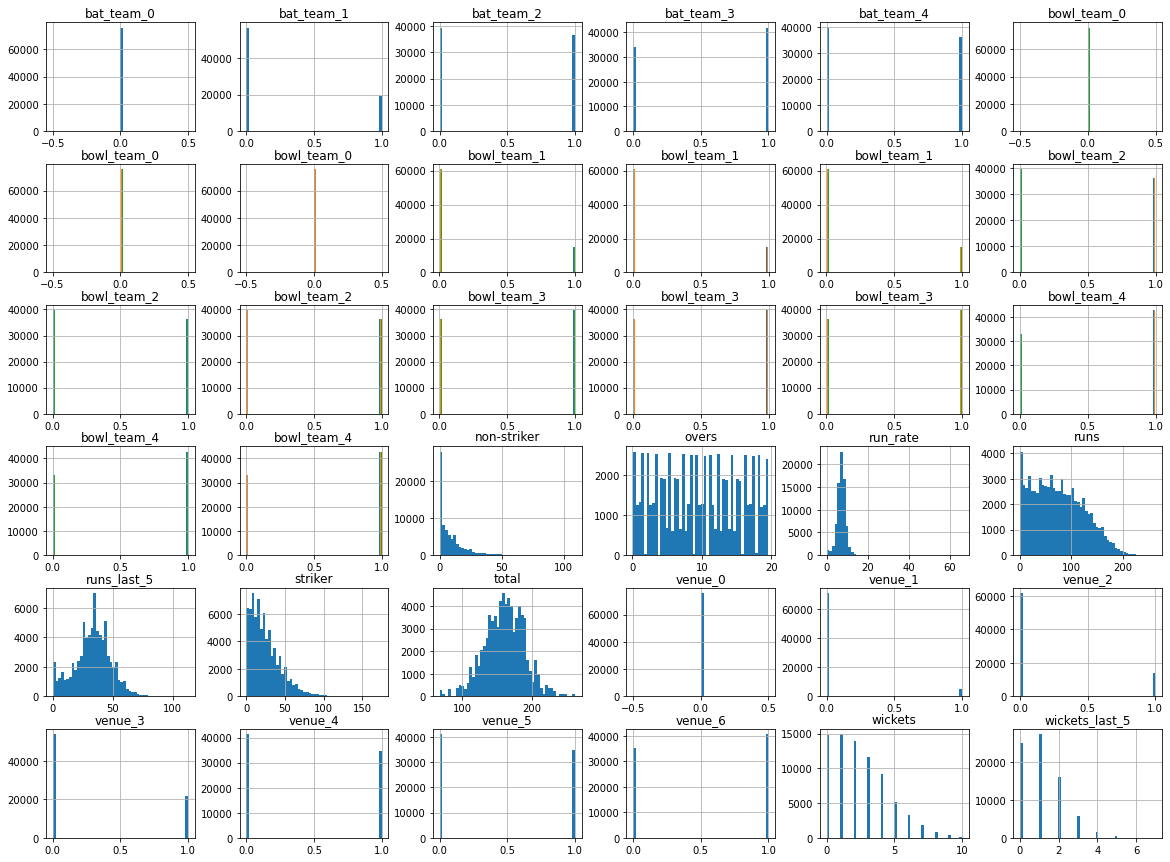

In [58]:

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


some of the features have constant values throughout. We should not include them. Let's drop them

In [59]:

df = df.drop(['venue_0', 'bat_team_0', 'bowl_team_0'], axis=1)


In [61]:
df.head(4)

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate,venue_1,...,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,6.0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0.2,1,0,0,0,222,3.0,0,...,0,1,0,0,0,1,0,0,0,1
2,2,0,0.2,2,0,0,0,222,6.0,0,...,0,1,0,0,0,1,0,0,0,1
3,2,0,0.3,2,0,0,0,222,4.0,0,...,0,1,0,0,0,1,0,0,0,1


In [62]:
df.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'run_rate', 'venue_1', 'venue_2', 'venue_3',
       'venue_4', 'venue_5', 'venue_6', 'bat_team_1', 'bat_team_2',
       'bat_team_3', 'bat_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3',
       'bowl_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3',
       'bowl_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3',
       'bowl_team_4'],
      dtype='object')

### Correlation of features with Total Score
As total score is our final goal Let check correlation with total score with other features.

In [64]:

df.corr()['total'].sort_values()


wickets          -0.337416
wickets_last_5   -0.273506
venue_3          -0.130892
venue_4          -0.099074
bat_team_1       -0.060211
bowl_team_2      -0.059253
bowl_team_2      -0.059253
bowl_team_2      -0.059253
venue_6          -0.045118
venue_2          -0.041050
venue_5          -0.026509
bat_team_4       -0.015796
bowl_team_1      -0.011330
bowl_team_1      -0.011330
bowl_team_1      -0.011330
bowl_team_4       0.018386
bowl_team_4       0.018386
bowl_team_4       0.018386
overs             0.022440
bowl_team_3       0.032148
bowl_team_3       0.032148
bowl_team_3       0.032148
venue_1           0.052469
bat_team_3        0.056845
bat_team_2        0.066630
runs              0.254801
non-striker       0.293394
runs_last_5       0.368893
striker           0.381967
run_rate          0.464813
total             1.000000
Name: total, dtype: float64

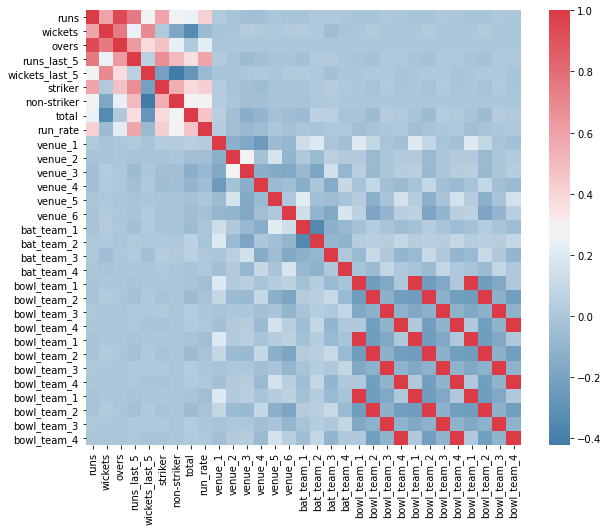

In [65]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


Let's zoom in the data with a new dataframe to closely capture correlation

In [66]:
df_cor = df.drop(['venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_6', 'bat_team_1', 'bat_team_2', 'bat_team_3', 'bat_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3', 'bowl_team_4'], axis=1)

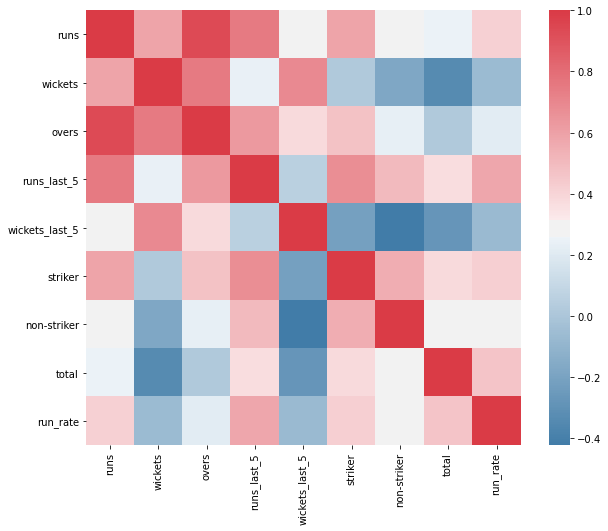

In [67]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df_cor.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


In [68]:
df_cor.corr()['total'].sort_values()

wickets          -0.337416
wickets_last_5   -0.273506
overs             0.022440
runs              0.254801
non-striker       0.293394
runs_last_5       0.368893
striker           0.381967
run_rate          0.464813
total             1.000000
Name: total, dtype: float64

see the relative distribution of total with different features

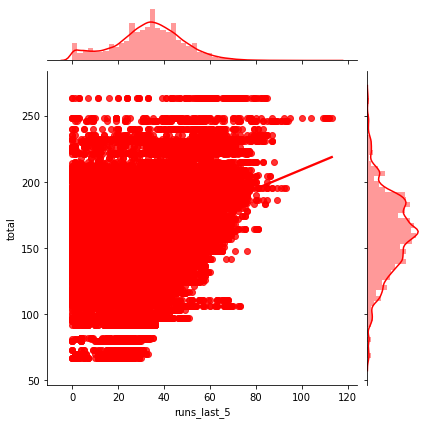

In [69]:
sns.jointplot(x="runs_last_5", y = "total", data=df, kind='reg', color = 'red')

The positive trend shown in heatmap. 
that with increasing values of runs_last_5 we do get higher total scores. 

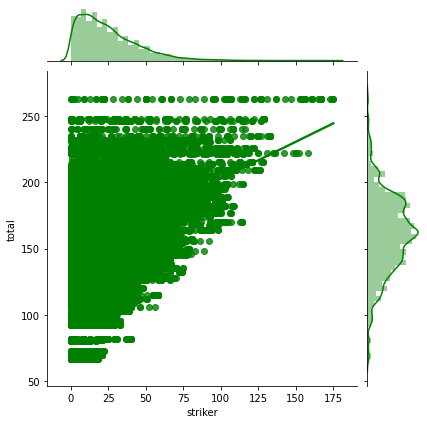

In [70]:

sns.jointplot(x="striker", y = "total", data=df, kind = 'reg', color = 'green')


This one show out a very interesting trend that we seem to also realize in real time matches: if high scoring (well set) batsman is at strike, you can expect the total to go high. 

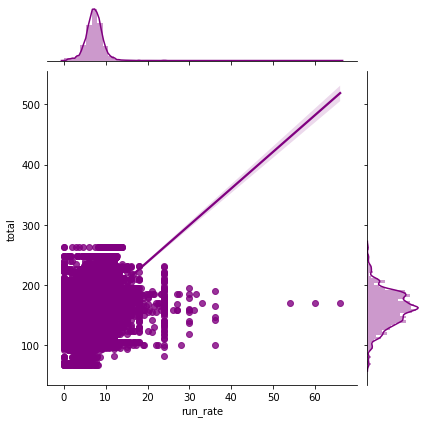

In [71]:

sns.jointplot(x="run_rate", y = "total", data=df, kind = 'reg', color = 'purple')



There is very high very high slope indicates that show that 
there is very strong correlation between the strike rate and total.

In [ ]:
sns.jointplot(x="run_rate", y = "total", data=df, kind = 'kde', color = 'purple')

### Data Splitting and Scaling

In [73]:
df.head(4)

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate,venue_1,...,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,6.0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0.2,1,0,0,0,222,3.0,0,...,0,1,0,0,0,1,0,0,0,1
2,2,0,0.2,2,0,0,0,222,6.0,0,...,0,1,0,0,0,1,0,0,0,1
3,2,0,0.3,2,0,0,0,222,4.0,0,...,0,1,0,0,0,1,0,0,0,1


In [44]:
print(df.columns)

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'run_rate', 'venue_1', 'venue_2', 'venue_3',
       'venue_4', 'venue_5', 'venue_6', 'bat_team_1', 'bat_team_2',
       'bat_team_3', 'bat_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3',
       'bowl_team_4'],
      dtype='object')


In [74]:
# Lets use train_test_split
# as our target is total so y will be total and all other 38 featuers will be on x.


from sklearn.model_selection import train_test_split

X = df.drop('total', axis = 1)
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)



In [75]:
X_train.head(4)

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,run_rate,venue_1,venue_2,...,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
19921,88,2,12.5,30,1,31,0,6.857143,0,1,...,0,0,1,0,0,0,1,0,0,0
19076,101,8,17.4,26,3,24,4,5.716981,0,0,...,1,0,0,0,1,0,0,0,1,0
7756,48,3,5.4,44,3,15,0,8.470588,0,0,...,1,0,0,0,1,0,0,0,1,0
8116,16,1,3.2,16,1,10,5,4.800000,0,0,...,0,1,0,1,0,1,0,1,0,1


In [76]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[X_train.columns] = sc.fit_transform(X_train)
X_test[X_test.columns] = sc.fit_transform(X_test)


ValueError: Must have equal len keys and value when setting with an ndarray

In [77]:
X_test.head(4)

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,run_rate,venue_1,venue_2,...,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
39704,80,2,9.6,52,0,56,15,8.000000,0,0,...,1,1,0,0,1,1,0,0,1,1
57118,28,1,4.2,28,1,14,2,6.461538,0,1,...,0,1,0,1,0,1,0,1,0,1
71490,13,0,1.4,13,0,7,6,7.800000,0,1,...,1,0,0,1,1,0,0,1,1,0
22590,61,1,8.2,38,1,36,12,7.320000,0,0,...,1,0,1,0,1,0,1,0,1,0


## Model Selection

In [78]:
# As our model are regressor models
# so we will use r2_score, mean_squared error, 
# and mean_absolute_error for evaluating the models.

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def evaluation(model, X_train, y_train, X_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(X_train)
        print("Train Result:\n========================================")
        print(f"mean absolute error: {mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"root mean squared error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"r2 Score: {round(r2_score(y_train, pred), 2)}")
        
    if train == False:
        pred = model.predict(X_test)
        print("Test Result:\n=========================================")
        print(f"mean absolute error: {mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"r2 Score: {round(r2_score(y_test, pred), 2)}")


## Linear Regression

In [80]:


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)



Train Result:
mean absolute error: 14.93442502565827
_______________________________________________
root mean squared error: 20.208804698007416
_______________________________________________
r2 Score: 0.52

Test Result:
mean absolute error: 14.814430589811312
_______________________________________________
root mean squared error: 20.115465512344276
_______________________________________________
r2 Score: 0.53


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
# ## Finding out the right number of estimators
# root_mean_squared_error = []
# for i in range(1, 200, 10):
#     rfc = RandomForestRegressor(n_estimators = i, random_state = 0)
#     rfc.fit(X_train, y_train)
#     root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, rfc.predict(X_test))))
# plt.plot(root_mean_squared_error)

In [82]:


from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 25, random_state = 0)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)



Train Result:
mean absolute error: 1.7110226585059165
_______________________________________________
root mean squared error: 3.6645437826106275
_______________________________________________
r2 Score: 0.98

Test Result:
mean absolute error: 4.281483572535796
_______________________________________________
root mean squared error: 8.593736126334873
_______________________________________________
r2 Score: 0.91


In [ ]:
# Perfect positive linear association. The points are exactly on the trend line.
# Correlation r = 1; R-squared = 1.00
# Large positive linear association. The points are close to the linear trend line.
# Correlation r = 0.9; R=squared = 0.81.
# Small positive linear association. The points are far from the trend line.
# Correlation r = 0.45; R-squared = 0.2025.
# No association. There is no association between the variables.
# Correlation r = 0.0; R-squared = 0.0.
# Small negative association.
# Correlation r = -0.3. R-squared = 0.09.
# Large negative association.
# Correlation r = -0.95; R-squared = 0.9025
# Perfect negative association.
# Correlation r = -1. R-squared = 1.00.

In [ ]:
# As we can see that error when doing with random forest is very low. 
# and also we are getting about 0.91 r2 Score 
# that is around 91% accuracy.

In [83]:

## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV



In [84]:

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [85]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-408.69203357731357


In [86]:
prediction=ridge_regressor.predict(X_test)

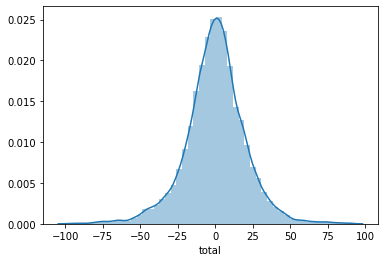

In [87]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [92]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 14.813618502847277
MSE: 404.62899006354206
RMSE: 20.115391869499884


In [90]:
evaluation(ridge_regressor, X_train, y_train, X_test, y_test, False)

Test Result:
mean absolute error: 14.813618502847277
_______________________________________________
root mean squared error: 20.115391869499884
_______________________________________________
r2 Score: 0.53


In [93]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [94]:
# As we can see most of the scores are around 150.

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [110]:
p_lasso = lasso_regressor.predict(X_test)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, p_lasso))
print('MSE:', metrics.mean_squared_error(y_test, p_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p_lasso)))

MAE: 0.0019001292130106995
MSE: 5.769439994108699e-06
RMSE: 0.002401965860312902


In [113]:
evaluation(lasso_regressor, X_train, y_train, X_test, y_test, False)

Test Result:
mean absolute error: 0.0019001292130106995
_______________________________________________
root mean squared error: 0.002401965860312902
_______________________________________________
r2 Score: 1.0


## Hyperparameter tuning

In [65]:
# from sklearn.model_selection import GridSearchCV

# RFC = RandomForestRegressor()


# ## Search grid for optimal parameters
# rf_param_grid = {"max_depth": [None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [False],
#               "n_estimators" :[100,300]}


# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, n_jobs= 4, verbose = 1)

# gsRFC.fit(X_train,y_train)

# RFC_best = gsRFC.best_estimator_

# # Best score
# gsRFC.best_score_

### Data Prep

In [66]:
data.head(1)

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate,venue_0,...,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,6.0,0,...,0,0,0,0,1,0,0,0,0,1


In [67]:
data.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate,venue_0,...,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
count,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.0,...,75977.0,75977.000000,75977.000000,75977.000000,75977.000000,75977.0,75977.000000,75977.000000,75977.000000,75977.000000
mean,74.925135,2.417021,9.787832,33.231925,1.120852,24.974426,8.873606,160.899062,7.202921,0.0,...,0.0,0.252024,0.480158,0.552444,0.475065,0.0,0.196678,0.477710,0.522276,0.563289
std,48.808266,2.014992,5.769953,14.901259,1.053309,20.077097,10.796596,29.248812,2.233949,0.0,...,0.0,0.434178,0.499609,0.497245,0.499381,0.0,0.397489,0.499506,0.499507,0.495982
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,6.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,7.232143,0.0,...,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,8.400000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000
max,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,66.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [68]:
corr_matrix = data.corr()
corr_matrix['total'].sort_values(ascending=False)

total             1.000000
run_rate          0.464813
striker           0.381967
runs_last_5       0.368893
non-striker       0.293394
runs              0.254801
bat_team_2        0.066630
bat_team_3        0.056845
venue_1           0.052469
bowl_team_3       0.032148
overs             0.022440
bowl_team_4       0.018386
bowl_team_1      -0.011330
bat_team_4       -0.015796
venue_5          -0.026509
venue_2          -0.041050
venue_6          -0.045118
bowl_team_2      -0.059253
bat_team_1       -0.060211
venue_4          -0.099074
venue_3          -0.130892
wickets_last_5   -0.273506
wickets          -0.337416
venue_0                NaN
bat_team_0             NaN
bowl_team_0            NaN
Name: total, dtype: float64

Correlation matrix suggests that most of the encoded features have very low correlations with the target. Even the other features don't have very high correlation values. Fetures can be modified for higher correlation value.

Shifting the target column for ease of split during features and target assignment.

In [69]:
df = data[['total']]
df.head(4)

,total
0,222
1,222
2,222
3,222


In [73]:
Data = data.drop('total', axis=1)

In [74]:
data = df.join(data, lsuffix='_caller', rsuffix='_other')

In [75]:
data.head(4)

,total_caller,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total_other,run_rate,...,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,222,1,0,0.1,1,0,0,0,222,6.0,...,0,0,0,0,1,0,0,0,0,1
1,222,1,0,0.2,1,0,0,0,222,3.0,...,0,0,0,0,1,0,0,0,0,1
2,222,2,0,0.2,2,0,0,0,222,6.0,...,0,0,0,0,1,0,0,0,0,1
3,222,2,0,0.3,2,0,0,0,222,4.0,...,0,0,0,0,1,0,0,0,0,1


In [77]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [59]:
print(X)

       runs  wickets  overs  runs_last_5  wickets_last_5  striker  \
0         1        0    0.1            1               0        0   
1         1        0    0.2            1               0        0   
2         2        0    0.2            2               0        0   
3         2        0    0.3            2               0        0   
4         2        0    0.4            2               0        0   
...     ...      ...    ...          ...             ...      ...   
76009   121        7   19.2           40               0       40   
76010   127        7   19.3           46               0       46   
76011   128        7   19.4           47               0       47   
76012   129        7   19.5           48               0       47   
76013   129        8   19.6           47               1       47   

       non-striker  run_rate  venue_1  venue_2  ...  venue_5  venue_6  \
0                0  6.000000        0        0  ...        0        1   
1                0  3.000

In [78]:
len(X)

75977

## Training

Spliting the dataset into training and test sets.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Standardization of the input range for rescaling the distribution of values to a standard scale

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [81]:
X_train

array([[-1.12293478, -1.19944262, -1.31308062, ..., -0.95691672,
         0.9548051 , -1.13596861],
       [-0.09832794, -0.20597249, -0.20339941, ...,  1.04502302,
         0.9548051 , -1.13596861],
       [ 1.76645652,  1.78096777,  1.66918762, ..., -0.95691672,
         0.9548051 , -1.13596861],
       ...,
       [ 0.20905412,  0.29076258,  0.09135966, ...,  1.04502302,
         0.9548051 , -1.13596861],
       [-0.63112349,  0.78749764, -0.75824001, ..., -0.95691672,
         0.9548051 , -1.13596861],
       [-0.22128076, -0.20597249, -0.11670557, ..., -0.95691672,
         0.9548051 ,  0.88030601]])

Use of RandomForestRegressor Algorithm for training on the dataset.

In [82]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

### Prediction and Validation

In [84]:
y_pred = reg.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 1.00


In [86]:
from sklearn.metrics import mean_squared_log_error
print('mean_squared_error: %.2f'
      % mean_squared_log_error(y_test, y_pred))

mean_squared_error: 0.00


This cell is using cross-validation to check for overfitting. Here we perform k-fold cross validation by splitting the data into 10 subsets. Then we train the algorithm iteratively on 9 of these and test it on the 10th set.

You may choose to not use this cell as it is just for checking and takes a lot of time to cross validate.

In [89]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
# print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
# print('Standard_Deviation: {:.2f} %'.format(accuracies.std()*100))

These results show that the values are similar to what we got earlier. Overfitting should not be a problem for this model on this data.

Another Personal Comment: can you make the input on app such that a selection of venue there means that a specific binary set of values for the encoded features. That would be really cool in terms of using the model and features that are encoded.